# Image Sampling Process Flow

## 1. Set up 

In [1]:
import os
import shutil
import csv
from datetime import datetime
import matplotlib.patches as mpatches

## 2. Record image metadata, copy and rename images

In [2]:
# Get current working directory
current_dir = os.getcwd()

# Go up one level to the parent directory
parent_dir = os.path.dirname(current_dir)

# Set path for the source folder (you can adjust as needed)
source_folder = os.path.join(parent_dir, "images")

# Set path for the destination folder in the parent directory
destination_folder = os.path.join(parent_dir, "idx_images")

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Define filenames for CSVs
csv_filename = "image_metadata.csv"
csv_path = os.path.join(destination_folder, csv_filename)
csv_out_path = os.path.join(destination_folder, "image_metadata_weather.csv")

print(f"Source images located in: {source_folder}")
print(f"Processed images and metadata will be saved to: {destination_folder}")
print(f"Main metadata CSV path: {csv_path}")
print(f"Weather-annotated metadata CSV path: {csv_out_path}")

Source images located in: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\images
Processed images and metadata will be saved to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images
Main metadata CSV path: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images\image_metadata.csv
Weather-annotated metadata CSV path: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images\image_metadata_weather.csv


In [3]:
os.makedirs(destination_folder, exist_ok=True)

In [4]:
image_files = sorted([f for f in os.listdir(source_folder) if f.endswith('.png')])

In [6]:
def get_season(month):
    month = int(month)
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'unknown'

In [7]:
def get_daytime(hour, minute, second):
    time_value = int(hour) * 10000 + int(minute) * 100 + int(second)
    if 0 <= time_value <= 65900:
        return 'night'
    elif 60000 <= time_value <= 115900:
        return 'morning'
    elif 120000 <= time_value <= 175900:
        return 'afternoon'
    elif 180000 <= time_value <= 235959:
        return 'evening'
    else:
        return 'unknown'

### 2.1 Run code for the first time to label all images

In [8]:
# Track processed images to avoid duplicates if resuming
processed = set()
if os.path.exists(csv_path):
    with open(csv_path, 'r', newline='') as f:
        reader = csv.reader(f)
        next(reader, None)  # Skip header
        for row in reader:
            if row:
                processed.add(row[0])

In [9]:
# Open CSV in append mode
with open(csv_path, 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header if file is new
    if os.stat(csv_path).st_size == 0:
        writer.writerow(['new_image_name', 'date', 'time', 'season', 'daytime'])

    idx = 1 if not processed else len(processed) + 1
    for old_name in image_files:
        new_name = f"img_{idx:05d}.png"
        if new_name in processed:
            idx += 1
            continue  # Skip already-processed files

        parts = old_name.replace('.png', '').split('_')
        year, month, day = parts[1], parts[2], parts[3]
        hour, minute, second = parts[4], parts[5], parts[6]
        date = f"{year}-{month}-{day}"
        time = f"{hour}:{minute}:{second}"

        season = get_season(month)
        daytime = get_daytime(hour, minute, second)

        shutil.copy(os.path.join(source_folder, old_name),
                    os.path.join(destination_folder, new_name))

        writer.writerow([new_name, date, time, season, daytime])
        csvfile.flush()  # Make sure it's written to disk
        print(f"Processed {old_name} -> {new_name} | {season}, {daytime}")

        idx += 1

print("Done!")

Processed img_2022_05_01_12_00_00.png -> img_15336.png | spring, afternoon
Processed img_2022_05_02_12_00_00.png -> img_15337.png | spring, afternoon
Processed img_2022_05_03_12_00_00.png -> img_15338.png | spring, afternoon
Processed img_2022_05_04_12_00_00.png -> img_15339.png | spring, afternoon
Processed img_2022_05_05_12_00_00.png -> img_15340.png | spring, afternoon
Processed img_2022_05_06_12_00_00.png -> img_15341.png | spring, afternoon
Processed img_2022_05_07_12_00_00.png -> img_15342.png | spring, afternoon
Processed img_2022_05_08_12_00_00.png -> img_15343.png | spring, afternoon
Processed img_2022_05_09_12_00_00.png -> img_15344.png | spring, afternoon
Processed img_2022_05_10_12_00_00.png -> img_15345.png | spring, afternoon
Processed img_2022_05_11_12_00_00.png -> img_15346.png | spring, afternoon
Processed img_2022_05_12_12_00_00.png -> img_15347.png | spring, afternoon
Processed img_2022_05_13_12_00_00.png -> img_15348.png | spring, afternoon
Processed img_2022_05_14_

### 2.2 Run code for additional images after a defined cut-off date

In [8]:
# Define the cutoff date (inclusive)
cutoff_date_str = "2025_08_03_00_00_00"
cutoff_dt = datetime.strptime(cutoff_date_str, "%Y_%m_%d_%H_%M_%S")


In [9]:
processed = set()
if os.path.exists(csv_path):
    with open(csv_path, 'r', newline='') as f:
        reader = csv.reader(f)
        next(reader, None)  # Skip header
        for row in reader:
            if row:
                processed.add(row[0])


In [10]:
# Open CSV in append mode
with open(csv_path, 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write header if file is new
    if os.stat(csv_path).st_size == 0:
        writer.writerow(['new_image_name', 'date', 'time', 'season', 'daytime'])

    idx = 1 if not processed else len(processed) + 1
    
    for old_name in image_files:
        # Extract datetime from filename
        try:
            file_dt = datetime.strptime('_'.join(old_name.replace('.png', '').split('_')[1:]), "%Y_%m_%d_%H_%M_%S")
        except ValueError:
            print(f"Skipping {old_name} (invalid format)")
            continue
        
        # Skip images before cutoff date
        if file_dt < cutoff_dt:
            continue

        new_name = f"img_{idx:05d}.png"
        if new_name in processed:
            idx += 1
            continue  # Skip already-processed files

        year, month, day = file_dt.strftime("%Y"), file_dt.strftime("%m"), file_dt.strftime("%d")
        hour, minute, second = file_dt.strftime("%H"), file_dt.strftime("%M"), file_dt.strftime("%S")
        date = f"{year}-{month}-{day}"
        time = f"{hour}:{minute}:{second}"

        season = get_season(month)
        daytime = get_daytime(hour, minute, second)

        shutil.copy(os.path.join(source_folder, old_name),
                    os.path.join(destination_folder, new_name))

        writer.writerow([new_name, date, time, season, daytime])
        csvfile.flush()  # Ensure writing to disk
        print(f"Processed {old_name} -> {new_name} | {season}, {daytime}")

        idx += 1

print("Done!")

Processed img_2025_08_03_00_00_00.png -> img_16888.png | summer, night
Processed img_2025_08_03_00_20_00.png -> img_16889.png | summer, night
Processed img_2025_08_03_00_40_00.png -> img_16890.png | summer, night
Processed img_2025_08_03_01_00_00.png -> img_16891.png | summer, night
Processed img_2025_08_03_01_20_00.png -> img_16892.png | summer, night
Processed img_2025_08_03_01_40_00.png -> img_16893.png | summer, night
Processed img_2025_08_03_02_00_00.png -> img_16894.png | summer, night
Processed img_2025_08_03_02_20_00.png -> img_16895.png | summer, night
Processed img_2025_08_03_02_40_00.png -> img_16896.png | summer, night
Processed img_2025_08_03_03_00_00.png -> img_16897.png | summer, night
Processed img_2025_08_03_03_20_00.png -> img_16898.png | summer, night
Processed img_2025_08_03_03_40_00.png -> img_16899.png | summer, night
Processed img_2025_08_03_04_00_00.png -> img_16900.png | summer, night
Processed img_2025_08_03_04_20_00.png -> img_16901.png | summer, night
Proces

## 3. Labeling the waether status on images

To annotate weather conditions in the image dataset, we employ the OpenAI CLIP (Contrastive Language–Image Pretraining) model for automated image labeling. CLIP is a vision-language model that aligns image and text representations in a shared embedding space, enabling zero-shot classification using natural language prompts. (Radford at all. 2021) This capability is particularly valuable in environmental datasets, where pre-labeled data for specific weather categories may be limited or unavailable. By leveraging CLIP, we can assign weather labels such as "clear sky," "rain," "fog," or "snowfall" to images based on their visual content and natural language queries, without the need for additional supervised training. 

The decision to use CLIP is motivated by its demonstrated effectiveness on a broad range of visual classification tasks and its flexibility in adapting to novel label sets. This approach accelerates the labeling process, ensures consistency across large image collections, and allows for efficient expansion or modification of the labeling scheme as required by the experimental design.

**Sources:**
* Github OpenAI CLIP, https://github.com/openai/CLIP
* Radford, A., Kim, J. W., Hallacy, C., Ramesh, A., Goh, G., Agarwal, S., ... & Sutskever, I. (2021). Learning Transferable Visual Models From Natural Language Supervision. arXiv preprint arXiv:2103.00020, https://arxiv.org/abs/2103.00020
* Feng, Y., Chen, H., Lin, X., & Wang, J. (2019). Deep learning for content-based image retrieval: A comprehensive study. Journal of Visual Communication and Image Representation, 62, 102577, https://www.sciencedirect.com/science/article/pii/S1047320318303523
* 

In [22]:
#%%capture
#!pip install torch torchvision

In [23]:
#%%capture
#!pip install git+https://github.com/openai/CLIP.git

In [24]:
#%%capture
#!pip install Pillow tqdm

In [6]:
import os
import clip
import torch
from PIL import Image
from tqdm import tqdm
import csv
import pandas as pd
import matplotlib.pyplot as plt
import calendar


In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [32]:
# Define weather categories and prompts
weather_categories = ['sunny', 'foggy', 'rainy', 'stormy', 'cloudy', 'snowfall']

In [33]:
# Prepare text features for the weather categories
text_inputs = torch.cat([clip.tokenize(f'a photo of {c} landscape with lake and mountains') for c in weather_categories]).to(device)


In [89]:
# Step 1: Prepare set of already labeled images
already_labeled = set()
if os.path.exists(csv_out_path):
    with open(csv_out_path, 'r', newline='') as outf:
        reader = csv.reader(outf)
        header_out = next(reader)
        idx_img = header_out.index('new_image_name') if 'new_image_name' in header_out else 0
        for row in reader:
            if row and len(row) > idx_img:
                already_labeled.add(row[idx_img])

In [105]:
# Step 2: Open input and output CSVs, process images as needed
with open(csv_path, 'r', newline='') as infile, \
     open(csv_out_path, 'a', newline='') as outfile:  # append mode!

    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    header = next(reader)
    # Only write header if outfile is empty
    if os.stat(csv_out_path).st_size == 0:
        writer.writerow(header + ['weather_label'])

    # For progress bar: count remaining to process
    to_process = [row for row in reader if row and row[0] not in already_labeled]
    print(f"Images to process: {len(to_process)} of {sum(1 for _ in open(csv_path)) - 1}")

    for row in tqdm(to_process, desc="Processing images"):
        image_name = row[0]
        image_path = os.path.join(destination_folder, image_name)
        try:
            image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
            with torch.no_grad():
                image_features = model.encode_image(image)
                image_features /= image_features.norm(dim=-1, keepdim=True)
                text_features = model.encode_text(text_inputs)
                text_features /= text_features.norm(dim=-1, keepdim=True)
                similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
                predicted_idx = similarity.argmax().item()
                weather_pred = weather_categories[predicted_idx]
        except Exception as e:
            print(f"Error with {image_name}: {e}")
            weather_pred = 'unknown'

        writer.writerow(row + [weather_pred])
        outfile.flush()  # flush after every row

print(f"Weather labeling complete. Results saved to {csv_out_path}")

Images to process: 0 of 27592


Processing images: 0it [00:00, ?it/s]

Weather labeling complete. Results saved to C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images\image_metadata_weather.csv


In [7]:
# Load the CSV
img_df = pd.read_csv(csv_out_path)

In [8]:
img_df.head()

,new_image_name,date,time,season,daytime,weather_label
0,img_00001.png,01/05/2022,12:00:00,spring,afternoon,sunny
1,img_00002.png,02/05/2022,12:00:00,spring,afternoon,sunny
2,img_00003.png,03/05/2022,12:00:00,spring,afternoon,cloudy
3,img_00004.png,04/05/2022,12:00:00,spring,afternoon,cloudy
4,img_00005.png,05/05/2022,12:00:00,spring,afternoon,rainy


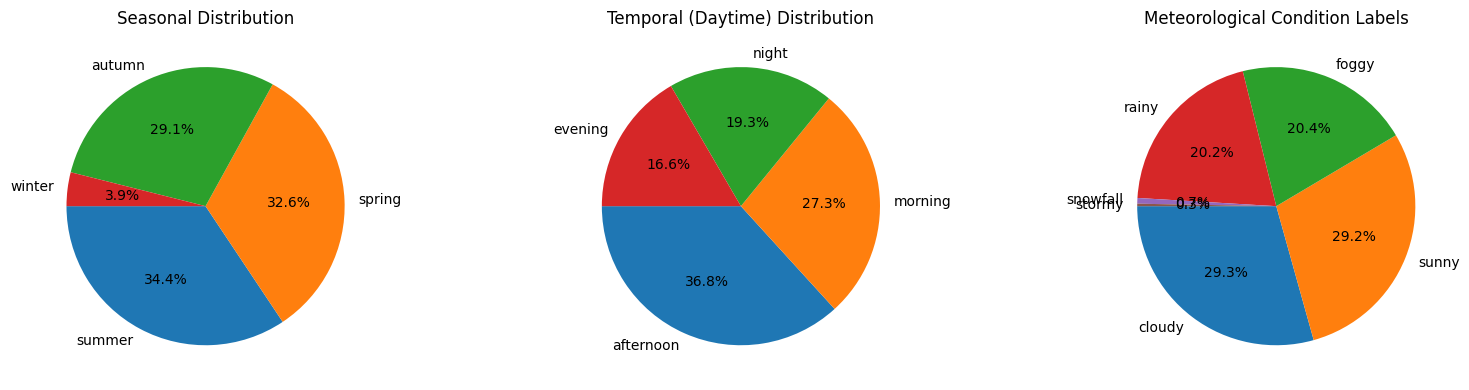

In [12]:
# --- Proportion Pie Charts ---
plt.figure(figsize=(16,4))

# By Season
plt.subplot(1, 3, 1)
img_df['season'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, title='Seasonal Distribution')
plt.ylabel('')

# By Daytime
plt.subplot(1, 3, 2)
img_df['daytime'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, title='Temporal (Daytime) Distribution')
plt.ylabel('')

# By Weather Label
plt.subplot(1, 3, 3)
img_df['weather_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, title='Meteorological Condition Labels')
plt.ylabel('')

plt.tight_layout()
plt.savefig('proportion_piecharts.jpg', dpi=300)
plt.show()

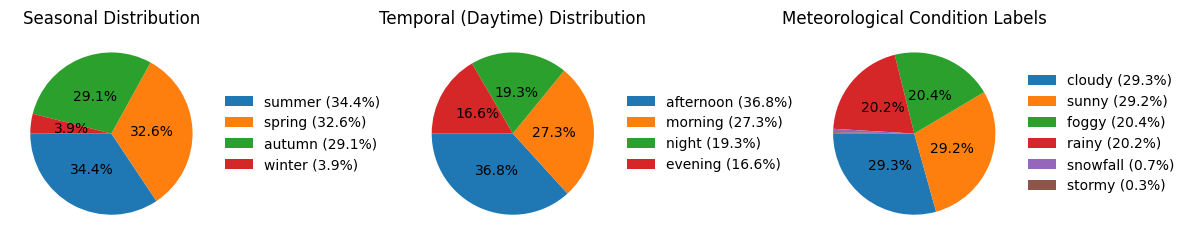

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def autopct_hide_small(pct, threshold=3):
    """Show percent only if it is >= threshold."""
    return f'{pct:.1f}%' if pct >= threshold else ''

def plot_pie_with_legend(ax, series, title, threshold=3):
    """
    Plot a pie chart on ax with no labels on wedges,
    percent labels (>= threshold) on wedges,
    and a legend with category + percentage.
    """
    vals = series.value_counts()
    labels = vals.index
    sizes = vals.values
    total = sizes.sum()

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=[''] * len(labels),  # no labels directly on slices
        autopct=lambda pct: autopct_hide_small(pct, threshold=threshold),
        startangle=180,
        pctdistance=0.5,
    )

    ax.set_title(title)

    # legend labels with percentages
    legend_labels = [
        f"{lab} ({100 * size / total:.1f}%)"
        for lab, size in zip(labels, sizes)
    ]

    ax.legend(
        wedges,
        legend_labels,
        loc='center left',
        bbox_to_anchor=(1.0, 0.5),
        frameon=False,
    )


# --- Plot all three pies with legends ---
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_pie_with_legend(
    axes[0],
    img_df['season'],
    title="Seasonal Distribution",
    threshold=3
)

plot_pie_with_legend(
    axes[1],
    img_df['daytime'],
    title="Temporal (Daytime) Distribution",
    threshold=3
)

plot_pie_with_legend(
    axes[2],
    img_df['weather_label'],
    title="Meteorological Condition Labels",
    threshold=3
)

plt.tight_layout()
plt.savefig("proportion_piecharts_with_legends.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# Ensure correct parsing of date (DD/MM/YYYY format)
img_df['date'] = pd.to_datetime(img_df['date'], dayfirst=True, errors='coerce')

# Extract year and month as nullable integers (handles NaT safely)
img_df['year'] = img_df['date'].dt.year.astype('Int64')
img_df['month'] = img_df['date'].dt.month.astype('Int64')

# Optional: Month name for readability
img_df['month_name'] = img_df['date'].dt.month_name()


# Check the first rows
img_df.head()

,new_image_name,date,time,season,daytime,weather_label,year,month,month_name
0,img_00001.png,2022-05-01,12:00:00,spring,afternoon,sunny,2022,5,May
1,img_00002.png,2022-05-02,12:00:00,spring,afternoon,sunny,2022,5,May
2,img_00003.png,2022-05-03,12:00:00,spring,afternoon,cloudy,2022,5,May
3,img_00004.png,2022-05-04,12:00:00,spring,afternoon,cloudy,2022,5,May
4,img_00005.png,2022-05-05,12:00:00,spring,afternoon,rainy,2022,5,May


In [32]:
import calendar

# Group by month only, sum over all years
monthly_counts = img_df.groupby('month').size()

# Reindex to ensure calendar order Jan–Dec
monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)

# Add month names for readability
monthly_counts.index = [calendar.month_abbr[m] for m in monthly_counts.index]

print(monthly_counts)

Jan      93
Feb     903
Mar    3303
Apr    3150
May    2550
Jun    2979
Jul    3262
Aug    3239
Sep    3174
Oct    3256
Nov    1597
Dec      86
dtype: int64


In [33]:
# Correctly parse date and time columns
img_df['date'] = pd.to_datetime(img_df['date'], dayfirst=True, format='%d/%m/%Y', errors='coerce')
img_df['hour'] = pd.to_datetime(img_df['time'], format='%H:%M:%S', errors='coerce').dt.hour

# Extract year and month
img_df['year'] = img_df['date'].dt.year.astype('Int64')
img_df['month'] = img_df['date'].dt.month.astype('Int64')  # correct months
img_df['hour'] = pd.to_datetime(img_df['time'], format='%H:%M:%S', errors='coerce').dt.hour

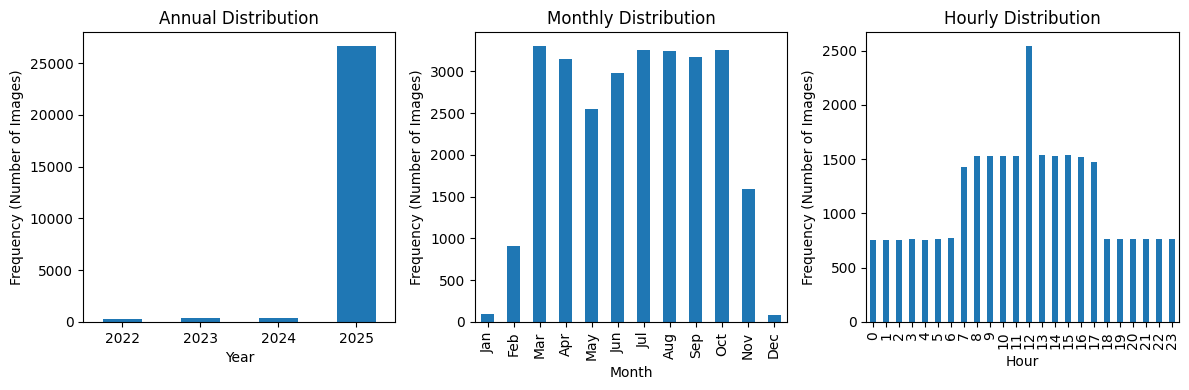

In [82]:
# --- Bar Charts: Counts by Year, Month, Hour ---
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Pictures by Year
year_counts = img_df.groupby('year').size().dropna()
year_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Annual Distribution')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency (Number of Images)')
axes[0].set_xticklabels(year_counts.index.astype(int), rotation=0)

# Pictures by Month (calendar order)
month_order = range(1, 13)
month_counts = img_df.groupby('month').size().reindex(month_order, fill_value=0)
month_labels = [calendar.month_abbr[m] for m in month_order]
month_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Monthly Distribution')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency (Number of Images)')
axes[1].set_xticklabels(month_labels, rotation=90)

# Pictures by Hour
hour_counts = img_df.groupby('hour').size().sort_index()
hour_counts.plot(kind='bar', ax=axes[2])
axes[2].set_title('Hourly Distribution')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Frequency (Number of Images)')
axes[2].set_xticks(range(len(hour_counts.index)))
axes[2].set_xticklabels(hour_counts.index, rotation=90)

plt.tight_layout()
fig.savefig('count_barcharts_from_columns.jpg', dpi=300)
plt.show()


## 4. Merge with Real World Weather data for Stratified Sampling

After recording image metadata and assigning unique index numbers, automated labeling is performed using the OpenAI CLIP model. The categorical labels—season, weather, and daytime—are extracted for each image. These labels facilitate the application of stratified sampling during the model training process. Stratified sampling involves partitioning the dataset into distinct subgroups (strata) based on key attributes, in this case, environmental and temporal conditions. This approach ensures that each subgroup is adequately represented in the training data, which is crucial for developing a model that can generalize effectively to varying weather and lighting scenarios. Employing stratified sampling has been shown to reduce sampling bias and improve the robustness of machine learning models trained on diverse and imbalanced datasets. 

**Sources:**
* Fernández, A., García, S., Galar, M., Prati, R. C., Krawczyk, B., & Herrera, F. (2018). Learning from Imbalanced Data Sets. Springer, pp. 45-56., https://link.springer.com/chapter/10.1007/978-3-319-98074-4_3
* López, V., Fernández, A., García, S., Palade, V., & Herrera, F. (2013). An insight into classification with imbalanced data: Empirical results and current trends on using data intrinsic characteristics. Information Sciences, 250, 113-141., https://www.sciencedirect.com/science/article/pii/S0020025513005124


In [24]:
#%%capture
#!pip install scikit-learn

In [25]:
#%%capture
#!pip install seaborn

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [37]:
# Coloring function
def color_beaufort(row):
    bfr = row['Beaufort']
    if isinstance(bfr, int) or (isinstance(bfr, str) and bfr.isdigit()):
        bfr = int(bfr)
    if bfr >= 9:
        return ['background-color: darkred; color: white']*len(row)
    elif 6 <= bfr <= 8:
        return ['background-color: red; color: white']*len(row)
    else:
        return ['']*len(row)

In [38]:
# Beaufort scale table in English
beaufort_data = [
    [0, "0–0.2", "<1", "<1", "<1", "calm"],
    [1, "0.3–1.5", "1–5", "1–3", "1–3", "light_air"],
    [2, "1.6–3.3", "6–11", "4–6", "4–7", "light_breeze"],
    [3, "3.4–5.4", "12–19", "7–10", "8–12", "light_wind"],
    [4, "5.5–7.9", "20–28", "11–16", "13–18", "moderate_wind"],
    [5, "8.0–10.7", "29–38", "17–21", "19–24", "wind"],
    [6, "10.8–13.8", "39–49", "22–27", "25–31", "strong_wind"],
    [7, "13.9–17.1", "50–61", "28–33", "32–38", "heavy_wind"],
    [8, "17.2–20.7", "62–74", "34–40", "39–46", "stormy_wind"],
    [9, "20.8–24.4", "75–88", "41–47", "47–54", "storm"],
    [10, "24.5–28.4", "89–102", "48–55", "55–63", "heavy_storm"],
    [11, "28.5–32.6", "103–117", "56–63", "64–72", "violent_storm"],
    [12, ">32.7", ">118", ">64", ">73", "hurricane"]
]

columns = [
    "Beaufort",
    "m/s",
    "km/h",
    "kts",
    "mph",
    "Description"
]

beaufort_df = pd.DataFrame(beaufort_data, columns=columns)

# Display with styling
beaufort_df.style.apply(color_beaufort, axis=1)

,Beaufort,m/s,km/h,kts,mph,Description
0,0,0–0.2,<1,<1,<1,calm
1,1,0.3–1.5,1–5,1–3,1–3,light_air
2,2,1.6–3.3,6–11,4–6,4–7,light_breeze
3,3,3.4–5.4,12–19,7–10,8–12,light_wind
4,4,5.5–7.9,20–28,11–16,13–18,moderate_wind
5,5,8.0–10.7,29–38,17–21,19–24,wind
6,6,10.8–13.8,39–49,22–27,25–31,strong_wind
7,7,13.9–17.1,50–61,28–33,32–38,heavy_wind
8,8,17.2–20.7,62–74,34–40,39–46,stormy_wind
9,9,20.8–24.4,75–88,41–47,47–54,storm


In [39]:
# Define the path for the weatherdata folder, which is a sibling of idx_images
weatherdata_folder = os.path.join(parent_dir, "weatherdata")
weatherdata_filename = "merlingen_weather_data.csv"
weatherdata_path = os.path.join(weatherdata_folder, weatherdata_filename)

print(f"Weather data CSV path: {weatherdata_path}")

Weather data CSV path: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\weatherdata\merlingen_weather_data.csv


In [40]:
# Now, read your CSVs using these absolute paths
#img_df = pd.read_csv(wavedetection_path)                 # This is in idx_images folder
weather_df = pd.read_csv(weatherdata_path, skiprows=9)   # This is in weatherdata folder

In [41]:
# Prepare weather_df timestamp (YYYYMMDDTHH00)
weather_df['timestamp'] = weather_df['timestamp'].astype(str)

In [42]:
#Prepare img_df timestamp (YYYYMMDDTHH00)
# Parse to datetime for safe processing
img_df['date'] = pd.to_datetime(img_df['date'])
img_df['hour'] = pd.to_datetime(img_df['time'], format='%H:%M:%S', errors='coerce').dt.hour

In [43]:
# Build timestamp string: e.g. 20220101T0800
img_df['weather_timestamp'] = img_df['date'].dt.strftime('%Y%m%dT') + img_df['hour'].astype(str).str.zfill(2) + '00'

In [44]:
img_df['weather_timestamp'] = (
    img_df['date'].dt.strftime('%Y%m%dT')
    + img_df['hour'].fillna(0).astype(int).astype(str).str.zfill(2)
    + "00"
)

In [45]:
img_df['weather_timestamp']

0        20220501T1200
1        20220502T1200
2        20220503T1200
3        20220504T1200
4        20220505T1200
             ...      
27587    20251006T1200
27588    20251006T1900
27589    20251008T2200
27590    20251022T1000
27591    20251022T1900
Name: weather_timestamp, Length: 27592, dtype: object

In [46]:
#Select only the weather columns you need
cols = [
    'timestamp',
    'Merligen Temperature [2 m elevation corrected]',
    'Merligen Precipitation Total',
    'Merligen Snowfall Amount',
    'Merligen Sunshine Duration',
    'Merligen Wind Speed [10 m]',
    'Merligen Wind Direction [10 m]',
    'Merligen Wind Gust'
]
weather_df_sub = weather_df[cols].copy()

In [47]:
# Merge the two dataframes (left join: every img_df row gets the matching hour from weather_df)
merged_df = pd.merge(
    img_df,
    weather_df_sub,
    how='left',
    left_on='weather_timestamp',
    right_on='timestamp'
)

In [48]:
merged_df.head()

,new_image_name,date,time,season,daytime,weather_label,year,month,month_name,hour,weather_timestamp,timestamp,Merligen Temperature [2 m elevation corrected],Merligen Precipitation Total,Merligen Snowfall Amount,Merligen Sunshine Duration,Merligen Wind Speed [10 m],Merligen Wind Direction [10 m],Merligen Wind Gust
0,img_00001.png,2022-05-01,12:00:00,spring,afternoon,sunny,2022,5,May,12,20220501T1200,20220501T1200,12.370522,0.0,0.0,16.969696,7.993297,35.837646,23.039999
1,img_00002.png,2022-05-02,12:00:00,spring,afternoon,sunny,2022,5,May,12,20220502T1200,20220502T1200,14.890521,0.0,0.0,53.333332,7.127636,44.999985,22.680000
2,img_00003.png,2022-05-03,12:00:00,spring,afternoon,cloudy,2022,5,May,12,20220503T1200,20220503T1200,15.790522,0.0,0.0,48.484848,4.334974,131.633530,15.840000
3,img_00004.png,2022-05-04,12:00:00,spring,afternoon,cloudy,2022,5,May,12,20220504T1200,20220504T1200,15.620522,0.0,0.0,34.545456,5.860375,259.380340,19.080000
4,img_00005.png,2022-05-05,12:00:00,spring,afternoon,rainy,2022,5,May,12,20220505T1200,20220505T1200,11.230521,1.1,0.0,2.424241,3.600000,360.000000,13.320000


In [49]:
# Define the save path in the idx_images (images-idx) folder
merged_save_path = os.path.join(destination_folder, 'image_metadata_merged_weather.csv')

# Save to CSV in the destination folder
merged_df.to_csv(merged_save_path, index=False)

print(f'Merged CSV saved as {merged_save_path}')

Merged CSV saved as C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images\image_metadata_merged_weather.csv


In [50]:
# Define Beaufort scale breakpoints (in km/h) and labels
bfr_bins = [-np.inf, 1, 5, 11, 19, 28, 38, 49, 61, 74, 88, 102, 117, np.inf]
bfr_labels = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
]
wind_labels = [
    "calm", "light_air", "light_breeze", "light_wind", "moderate_wind", "wind",
    "strong_wind", "heavy_wind", "stormy_wind", "storm", "heavy_storm", "violent_storm", "hurricane"
]

# Assign Beaufort number (bfr)
merged_df['bfr'] = pd.cut(
    merged_df['Merligen Wind Speed [10 m]'],
    bins=bfr_bins,
    labels=bfr_labels,
    right=True
).astype('Int64') # Keeps NaN for missing

# Assign wind label
merged_df['wind_label'] = pd.cut(
    merged_df['Merligen Wind Speed [10 m]'],
    bins=bfr_bins,
    labels=wind_labels,
    right=True
)

# Check the first few rows
display(merged_df[['Merligen Wind Speed [10 m]', 'bfr', 'wind_label']].head(20))

,Merligen Wind Speed [10 m],bfr,wind_label
0,7.993297,2,light_breeze
1,7.127636,2,light_breeze
2,4.334974,1,light_air
3,5.860375,2,light_breeze
4,3.600000,1,light_air
5,7.412853,2,light_breeze
6,7.903619,2,light_breeze
7,10.691453,2,light_breeze
8,5.860375,2,light_breeze
9,4.349896,1,light_air


In [51]:
# Save to CSV in the destination folder
merged_df.to_csv(merged_save_path, index=False)

print(f'Merged CSV saved as {merged_save_path}')

Merged CSV saved as C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images\image_metadata_merged_weather.csv


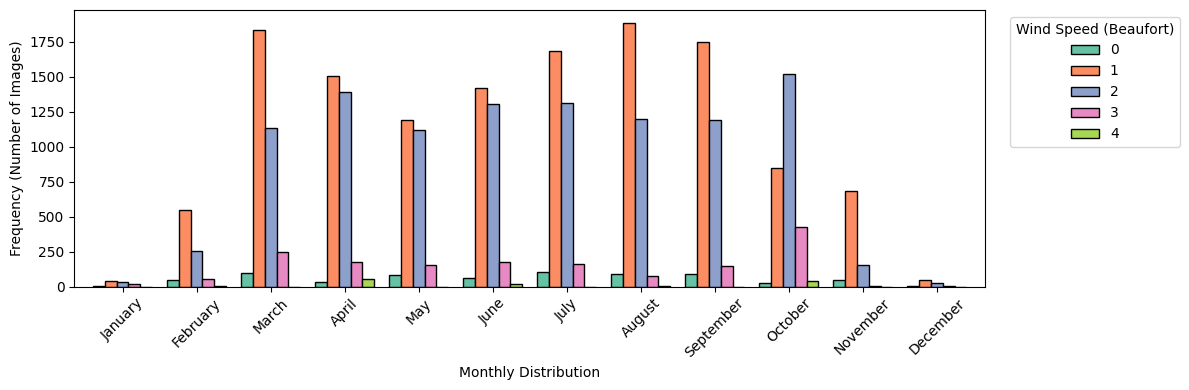

In [71]:

# Ensure 'date' is in datetime format and extract 'month'
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
merged_df['month'] = merged_df['date'].dt.month
merged_df['month_name'] = merged_df['date'].dt.strftime('%B')

# Group by month and wind_label, count occurrences
wind_month_counts = merged_df.groupby(['month_name', 'bfr']).size().unstack(fill_value=0)

# Define chronological order of months
ordered_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Reindex to chronological month order and drop months not present
wind_month_counts = wind_month_counts.reindex(ordered_months).dropna(how='all')

# Only keep wind labels actually in data
available_wind_labels = wind_month_counts.columns[wind_month_counts.sum(axis=0) > 0]
wind_month_counts = wind_month_counts[available_wind_labels]

# Set up a distinct color palette with seaborn
palette = sns.color_palette("Set2", n_colors=len(available_wind_labels))

# Plot with wider bars
ax = wind_month_counts.plot(
    kind='bar',
    stacked=False,
    figsize=(12,4),
    edgecolor='black',
    width=0.8,  # Wider bars
    color=palette
)

plt.xlabel('Monthly Distribution')
plt.ylabel('Frequency (Number of Images)')
#plt.title('Distribution of Windlevel Beaufort by Month')
plt.xticks(rotation=45)
plt.legend(title='Wind Speed (Beaufort)', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distribution_by_windlevel_beaufort_month.jpg', dpi=300)
plt.show()

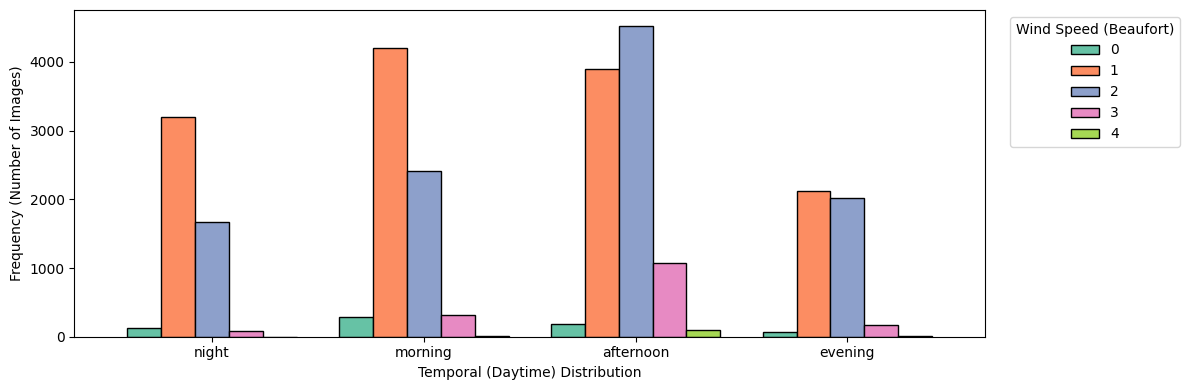

In [72]:

# Group by daytime and wind_label, count occurrences
wind_daytime_counts = merged_df.groupby(['daytime', 'bfr']).size().unstack(fill_value=0)

# Only keep wind labels actually in data
available_wind_labels = wind_daytime_counts.columns[wind_daytime_counts.sum(axis=0) > 0]
wind_daytime_counts = wind_daytime_counts[available_wind_labels]

# Order daytime categories if you want a logical order
daytime_order = ['night', 'morning', 'afternoon', 'evening']
wind_daytime_counts = wind_daytime_counts.reindex(daytime_order).dropna(how='all')

# Set up a distinct color palette with seaborn
palette = sns.color_palette("Set2", n_colors=len(available_wind_labels))

# Plot
ax = wind_daytime_counts.plot(
    kind='bar',
    stacked=False,
    figsize=(12,4),
    edgecolor='black',
    width=0.8,
    color=palette
)

plt.xlabel('Temporal (Daytime) Distribution')
plt.ylabel('Frequency (Number of Images)')
#plt.title('Distribution of Wind Level Beaufort by Daytime')
plt.xticks(rotation=0)
plt.legend(title='Wind Speed (Beaufort)', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distribution_by_windlevel_beaufort_daytime.jpg', dpi=300)
plt.show()

In [57]:
merged_df.head(40)

,new_image_name,date,time,season,daytime,weather_label,year,month,month_name,hour,...,timestamp,Merligen Temperature [2 m elevation corrected],Merligen Precipitation Total,Merligen Snowfall Amount,Merligen Sunshine Duration,Merligen Wind Speed [10 m],Merligen Wind Direction [10 m],Merligen Wind Gust,bfr,wind_label
0,img_00001.png,2022-05-01,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220501T1200,12.370522,0.0,0.0,16.969696,7.993297,35.837646,23.039999,2,light_breeze
1,img_00002.png,2022-05-02,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220502T1200,14.890521,0.0,0.0,53.333332,7.127636,44.999985,22.680000,2,light_breeze
2,img_00003.png,2022-05-03,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220503T1200,15.790522,0.0,0.0,48.484848,4.334974,131.633530,15.840000,1,light_air
3,img_00004.png,2022-05-04,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220504T1200,15.620522,0.0,0.0,34.545456,5.860375,259.380340,19.080000,2,light_breeze
4,img_00005.png,2022-05-05,12:00:00,spring,afternoon,rainy,2022,5,May,12,...,20220505T1200,11.230521,1.1,0.0,2.424241,3.600000,360.000000,13.320000,1,light_air
5,img_00006.png,2022-05-06,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220506T1200,11.540522,0.4,0.0,0.000000,7.412853,29.054580,28.440000,2,light_breeze
6,img_00007.png,2022-05-07,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220507T1200,14.240521,0.0,0.0,16.969696,7.903619,59.931410,33.839996,2,light_breeze
7,img_00008.png,2022-05-08,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220508T1200,15.230521,0.2,0.0,0.606061,10.691453,44.999985,32.039997,2,light_breeze
8,img_00009.png,2022-05-09,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220509T1200,17.540522,0.0,0.0,11.515152,5.860375,42.510437,17.640000,2,light_breeze
9,img_00010.png,2022-05-10,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220510T1200,19.360521,0.0,0.0,30.909090,4.349896,245.556060,24.480000,1,light_air


In [58]:
selected_df = merged_df[merged_df['bfr'].isin([4])]
selected_df.head(10)

,new_image_name,date,time,season,daytime,weather_label,year,month,month_name,hour,...,timestamp,Merligen Temperature [2 m elevation corrected],Merligen Precipitation Total,Merligen Snowfall Amount,Merligen Sunshine Duration,Merligen Wind Speed [10 m],Merligen Wind Direction [10 m],Merligen Wind Gust,bfr,wind_label
284,img_00285.png,2023-02-26,12:00:00,winter,afternoon,cloudy,2023,2,February,12,...,20230226T1200,-1.069478,0.2,0.14,17.575756,21.479664,50.440323,61.920002,4,moderate_wind
441,img_00442.png,2023-08-02,12:00:00,summer,afternoon,sunny,2023,8,August,12,...,20230802T1200,24.060522,0.0,0.00,54.545452,19.881649,238.324540,46.440000,4,moderate_wind
442,img_00443.png,2023-08-03,12:00:00,summer,afternoon,sunny,2023,8,August,12,...,20230803T1200,21.570522,0.0,0.00,32.727272,19.130875,250.201130,54.000000,4,moderate_wind
5113,img_05114.png,2025-04-01,10:00:00,spring,morning,sunny,2025,4,April,10,...,20250401T1000,6.370521,0.0,0.00,35.757576,19.174856,50.332153,50.399998,4,moderate_wind
5114,img_05115.png,2025-04-01,10:10:00,spring,morning,sunny,2025,4,April,10,...,20250401T1000,6.370521,0.0,0.00,35.757576,19.174856,50.332153,50.399998,4,moderate_wind
5115,img_05116.png,2025-04-01,10:20:00,spring,morning,sunny,2025,4,April,10,...,20250401T1000,6.370521,0.0,0.00,35.757576,19.174856,50.332153,50.399998,4,moderate_wind
5116,img_05117.png,2025-04-01,10:30:00,spring,morning,sunny,2025,4,April,10,...,20250401T1000,6.370521,0.0,0.00,35.757576,19.174856,50.332153,50.399998,4,moderate_wind
5117,img_05118.png,2025-04-01,10:40:00,spring,morning,sunny,2025,4,April,10,...,20250401T1000,6.370521,0.0,0.00,35.757576,19.174856,50.332153,50.399998,4,moderate_wind
5118,img_05119.png,2025-04-01,10:50:00,spring,morning,sunny,2025,4,April,10,...,20250401T1000,6.370521,0.0,0.00,35.757576,19.174856,50.332153,50.399998,4,moderate_wind
5119,img_05120.png,2025-04-01,11:00:00,spring,morning,sunny,2025,4,April,11,...,20250401T1100,7.530521,0.0,0.00,36.969692,19.228851,51.842773,53.639996,4,moderate_wind


### 3.1 Step 1: Oversample BFR 3–4, Undersample Night and Fog

In [59]:
# Keep only rows where wind_label is not empty or NaN
filtered_df = merged_df[merged_df['wind_label'].notna() & (merged_df['wind_label'].astype(str).str.strip() != '')]

print(filtered_df.shape)
filtered_df.head()

(26477, 21)


,new_image_name,date,time,season,daytime,weather_label,year,month,month_name,hour,...,timestamp,Merligen Temperature [2 m elevation corrected],Merligen Precipitation Total,Merligen Snowfall Amount,Merligen Sunshine Duration,Merligen Wind Speed [10 m],Merligen Wind Direction [10 m],Merligen Wind Gust,bfr,wind_label
0,img_00001.png,2022-05-01,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220501T1200,12.370522,0.0,0.0,16.969696,7.993297,35.837646,23.039999,2,light_breeze
1,img_00002.png,2022-05-02,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220502T1200,14.890521,0.0,0.0,53.333332,7.127636,44.999985,22.680000,2,light_breeze
2,img_00003.png,2022-05-03,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220503T1200,15.790522,0.0,0.0,48.484848,4.334974,131.633530,15.840000,1,light_air
3,img_00004.png,2022-05-04,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220504T1200,15.620522,0.0,0.0,34.545456,5.860375,259.380340,19.080000,2,light_breeze
4,img_00005.png,2022-05-05,12:00:00,spring,afternoon,rainy,2022,5,May,12,...,20220505T1200,11.230521,1.1,0.0,2.424241,3.600000,360.000000,13.320000,1,light_air


In [60]:
# Filter OUT whole August 2025 and the week of 20-26 October 2025 -> as these dates will be used for comparison of results with Mike 21

# 1️⃣ Exclude all of August 2025
mask_aug_2025 = (filtered_df['date'].dt.year == 2025) & (filtered_df['date'].dt.month == 8)

# 2️⃣ Exclude 20–26 October 2025
mask_oct_2025 = (
    (filtered_df['date'].dt.year == 2025) &
    (filtered_df['date'].dt.month == 10) &
    (filtered_df['date'].dt.day.between(20, 26))
)

# Apply exclusion
filtered_df = filtered_df[~(mask_aug_2025 | mask_oct_2025)]

print(filtered_df.shape)
filtered_df.head()

(22617, 21)


,new_image_name,date,time,season,daytime,weather_label,year,month,month_name,hour,...,timestamp,Merligen Temperature [2 m elevation corrected],Merligen Precipitation Total,Merligen Snowfall Amount,Merligen Sunshine Duration,Merligen Wind Speed [10 m],Merligen Wind Direction [10 m],Merligen Wind Gust,bfr,wind_label
0,img_00001.png,2022-05-01,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220501T1200,12.370522,0.0,0.0,16.969696,7.993297,35.837646,23.039999,2,light_breeze
1,img_00002.png,2022-05-02,12:00:00,spring,afternoon,sunny,2022,5,May,12,...,20220502T1200,14.890521,0.0,0.0,53.333332,7.127636,44.999985,22.680000,2,light_breeze
2,img_00003.png,2022-05-03,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220503T1200,15.790522,0.0,0.0,48.484848,4.334974,131.633530,15.840000,1,light_air
3,img_00004.png,2022-05-04,12:00:00,spring,afternoon,cloudy,2022,5,May,12,...,20220504T1200,15.620522,0.0,0.0,34.545456,5.860375,259.380340,19.080000,2,light_breeze
4,img_00005.png,2022-05-05,12:00:00,spring,afternoon,rainy,2022,5,May,12,...,20220505T1200,11.230521,1.1,0.0,2.424241,3.600000,360.000000,13.320000,1,light_air


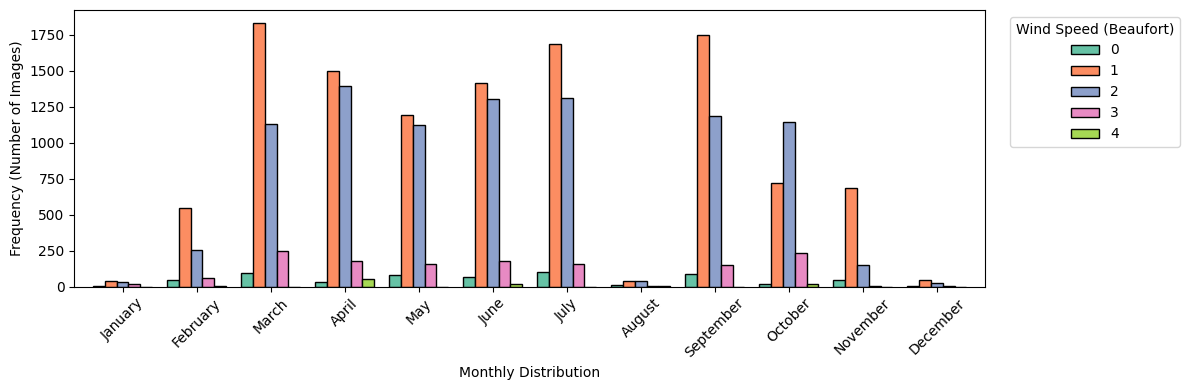

In [73]:
# Ensure 'date' is in datetime format and extract 'month'
filtered_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
filtered_df['month'] = filtered_df['date'].dt.month
filtered_df['month_name'] = filtered_df['date'].dt.strftime('%B')

# Group by month and wind_label, count occurrences
wind_month_counts = filtered_df.groupby(['month_name', 'bfr']).size().unstack(fill_value=0)

# Define chronological order of months
ordered_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Reindex to chronological month order and drop months not present
wind_month_counts = wind_month_counts.reindex(ordered_months).dropna(how='all')

# Only keep wind labels actually in data
available_wind_labels = wind_month_counts.columns[wind_month_counts.sum(axis=0) > 0]
wind_month_counts = wind_month_counts[available_wind_labels]

# Set up a distinct color palette with seaborn
palette = sns.color_palette("Set2", n_colors=len(available_wind_labels))

# Plot with wider bars
ax = wind_month_counts.plot(
    kind='bar',
    stacked=False,
    figsize=(12,4),
    edgecolor='black',
    width=0.8,  # Wider bars
    color=palette
)

plt.xlabel('Monthly Distribution')
plt.ylabel('Frequency (Number of Images)')
#plt.title('Distribution of Windlevel Beaufort by Month')
plt.xticks(rotation=45)
plt.legend(title='Wind Speed (Beaufort)', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('filtereddata_distribution_by_windlevel_beaufort_month.jpg', dpi=300)
plt.show()

In [62]:
# Oversample: bfr 3-4 (e.g., 3x)
oversample_df = filtered_df[filtered_df['bfr'].isin([3, 4])]
oversample_df = pd.concat([oversample_df]*2, ignore_index=True)  # 2x duplication (tune as needed)

# Undersample: night or foggy (keep only 50%)
undersample_condition = (filtered_df['daytime'] == 'night') | (filtered_df['weather_label'] == 'foggy') | (filtered_df['weather_label'] == 'rainy')
undersample_df = filtered_df[undersample_condition].sample(frac=0.5, random_state=42)

# All other rows (exclude the ones already oversampled or undersampled)
other_df = filtered_df[
    ~filtered_df.index.isin(oversample_df.index) &
    ~filtered_df.index.isin(undersample_df.index)
]

# Combine everything (avoiding duplicates)
augmented_df = pd.concat([other_df, oversample_df, undersample_df], ignore_index=True)

# Shuffle the DataFrame
augmented_df = augmented_df.sample(frac=1, random_state=42).reset_index(drop=True)

### 3.2 Step 2: Stratified Split (by season + weather_label)

In [51]:
# Create a stratification column combining key factors
augmented_df['strata'] = (
    augmented_df['season'].astype(str) + '_' +
    augmented_df['weather_label'].astype(str)
)

### 3.3 Step 3: Split to Train, Validation, Test

In [52]:
# First split train+val/test (15% test)
trainval_df, test_df = train_test_split(
    augmented_df, 
    test_size=0.15, 
    random_state=42, 
    stratify=augmented_df['strata']
)

# Then split train/val (15% val of original, so 0.15/(1-0.15) ≈ 0.176)
train_df, val_df = train_test_split(
    trainval_df, 
    test_size=0.176, 
    random_state=42, 
    stratify=trainval_df['strata']
)

# Drop the 'strata' column if not needed
for df in (train_df, val_df, test_df):
    df.drop(columns=['strata'], inplace=True, errors='ignore')

In [53]:
# Define save paths in the destination_folder
train_save_path = os.path.join( 'train_balanced.csv')
val_save_path = os.path.join('val_balanced.csv')
test_save_path = os.path.join('test_balanced.csv')

# Save to CSVs in the destination folder
train_df.to_csv(train_save_path, index=False)
val_df.to_csv(val_save_path, index=False)
test_df.to_csv(test_save_path, index=False)

print(f"Train set saved to: {train_save_path}")
print(f"Validation set saved to: {val_save_path}")
print(f"Test set saved to: {test_save_path}")

Train set saved to: train_balanced.csv
Validation set saved to: val_balanced.csv
Test set saved to: test_balanced.csv


In [54]:
# --------- Remove all Data Before Saving Splits ---------

info_columns = ['date','time','season','daytime','weather_label','year','month','month_name','hour','weather_timestamp','timestamp',
                'Merligen Temperature [2 m elevation corrected]','Merligen Precipitation Total','Merligen Snowfall Amount','Merligen Sunshine Duration',
                'Merligen Wind Speed [10 m]','Merligen Wind Direction [10 m]','Merligen Wind Gust',	'bfr','wind_label']  # Add/remove as needed

train_df_noinfo = train_df.drop(columns=info_columns, errors='ignore')
val_df_noinfo  = val_df.drop(columns=info_columns, errors='ignore')
test_df_noinfo  = test_df.drop(columns=info_columns, errors='ignore')


In [55]:
# Save splits
# Define save paths in the destination_folder
train_save_path_noinfo = os.path.join('train_for_training.csv')
val_save_path_noinfo = os.path.join('val_for_training.csv')
test_save_path_noinfo = os.path.join('test_for_training.csv')


train_df_noinfo.to_csv(train_save_path_noinfo, index=False)
val_df_noinfo.to_csv(val_save_path_noinfo, index=False)
test_df_noinfo.to_csv(test_save_path_noinfo, index=False)

print("Splits created with weather-based stratification, but weather data excluded from training files.")

Splits created with weather-based stratification, but weather data excluded from training files.


To ensure robust and unbiased model evaluation, we employed a stratified sampling approach based on environmental metadata, including wind, sun, and rain conditions, for partitioning the image dataset into training, validation, and test sets. This strategy ensures that all relevant environmental conditions—particularly high wind and storm events, which are of primary interest—are adequately represented in each subset of the data. Such stratification helps mitigate the risk of sampling bias and supports the development of a model that generalizes well across diverse meteorological scenarios.

Importantly, although weather variables were used to guide the stratified splitting, these variables were excluded from the feature set during model training and evaluation. The exclusion of explicit weather parameters ensures that the deep learning model learns to infer wave and weather-related phenomena from the image content alone, without direct reliance on external meteorological measurements. This is critical for fair benchmarking, as the resulting model predictions can then be objectively compared against those from a separate model developed using only meteorological (wind, rain, sun) data. This methodology also prevents potential information leakage between the weather-based and image-based modeling pipelines, supporting a rigorous and scientifically sound evaluation framework.